In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')


In [13]:
df = pd.read_csv('./vehicles.csv')


In [14]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [15]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

### Drop Columns that aren't Relevant to the Analysis

In [16]:
df = df.drop(["url","region_url","VIN","image_url","county","lat","long","id","posting_date"],axis=1)

In [17]:
nans = (df.isnull().sum().sort_values(ascending=False)/(len(df))).to_frame()
#nans.plot(kind='bar',title="Missing Values Summary",figsize=(8,6))

In [18]:
nans['count'] = nans[0]
nans.reset_index(inplace=True)

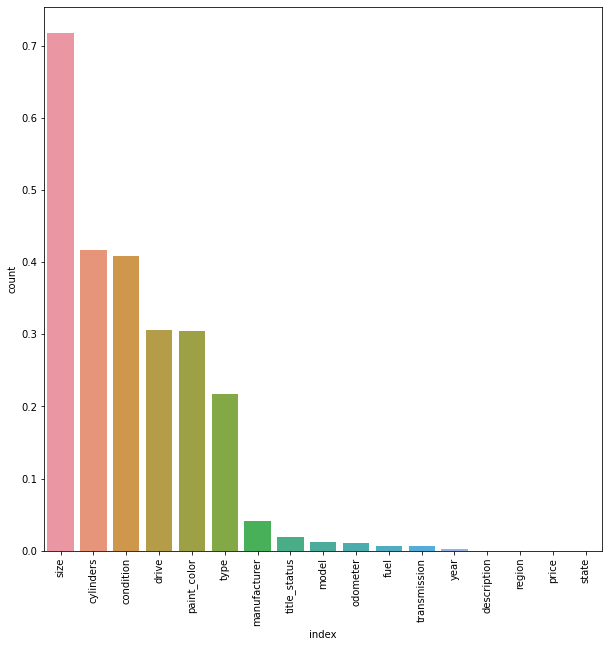

In [19]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'index', y= 'count', data=nans)
plt.xticks(rotation=90)
plt.show()

In [20]:
df.head(50)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [21]:
def caps(s):
    if type(s) is str:
        return s.capitalize()
    else:
        return None

In [22]:
df['manufacturer'] = df['manufacturer'].apply(caps)

### Create Column that Concatenates Make and Model Data

In [23]:
def make_model(make,modl):
    if make and modl:
        modstr = str(modl).split(" ")
        if len(modstr) > 1:
            result = str(make) + " " + modstr[0] + " " + modstr[1]
        else:
            result = str(make) + " " + modstr[0]  
        return result.capitalize()
    else:
        return None

In [24]:
df['manufacturer'].replace(to_replace='Rover',value='Land rover',inplace=True)
df['manufacturer'].replace(to_replace='Mercedes-benz',value='Mercedes',inplace=True)

In [26]:
df['make_model'] = df.apply(lambda row : make_model(row['manufacturer'],row['model']), axis = 1)
df['make_model'].value_counts().head()

Chevrolet silverado 1500    9047
Ford f-150                  8009
Gmc sierra 1500             4218
Ram 1500                    4069
Jeep grand cherokee         3998
Name: make_model, dtype: int64

In [27]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [28]:
df['manufacturer'].value_counts().head()

Ford         70985
Chevrolet    55064
Toyota       34202
Honda        21269
Nissan       19067
Name: manufacturer, dtype: int64

### Drop Null Values From Key Columns

In [120]:
df1 = df.copy()
df1.dropna(axis=0,how='any',subset=['manufacturer','make_model','title_status','odometer','year','price'],inplace=True)

In [121]:
df1['year'] = df1['year'].apply(lambda x: int(x))

In [122]:
filters = (df1['odometer'] > 5000.0) & (df1['odometer'] < 500000.0) & (df1['year'] >= 1955) & (df1['year'] < 2021) & (df1['price'] > 1500.0) & (df1['price'] < 99999) & (df1['manufacturer'] != 'harley-davidson') & (df1['cylinders'] != 'other')


In [123]:
df1 = df1[filters]

In [124]:
df1['manufacturer'].replace(to_replace='mercedes-benz',value='mercedes',inplace=True)

In [125]:
#df1 = df1.groupby('manufacturer').filter(lambda x : len(x)>20)

In [126]:
df1['year'].median()

2013.0

In [127]:
df1['price'].median()

15990.0

In [128]:
df1['odometer'].median()

90642.0

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

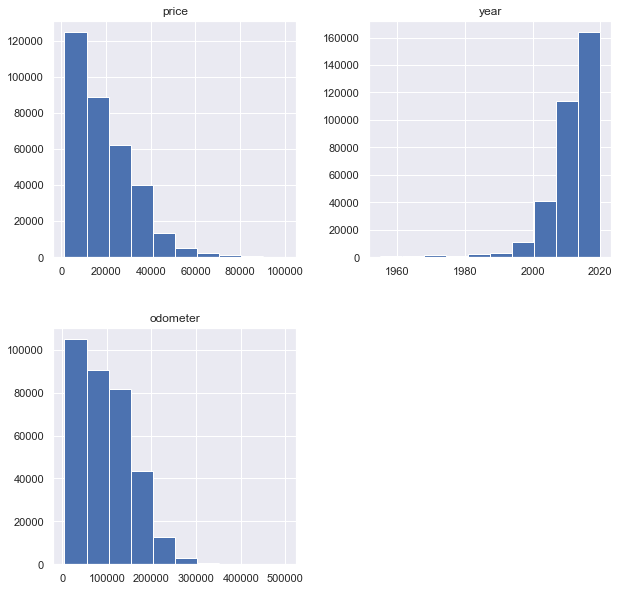

In [129]:
df1.hist(figsize=(10,10))

In [130]:
#df['manufacturer'].value_counts().head(30).plot(kind='pie',colors=colors,title='manufacturer',figsize=(10,10))

In [131]:
#df['manufacturer'].value_counts().head(25)

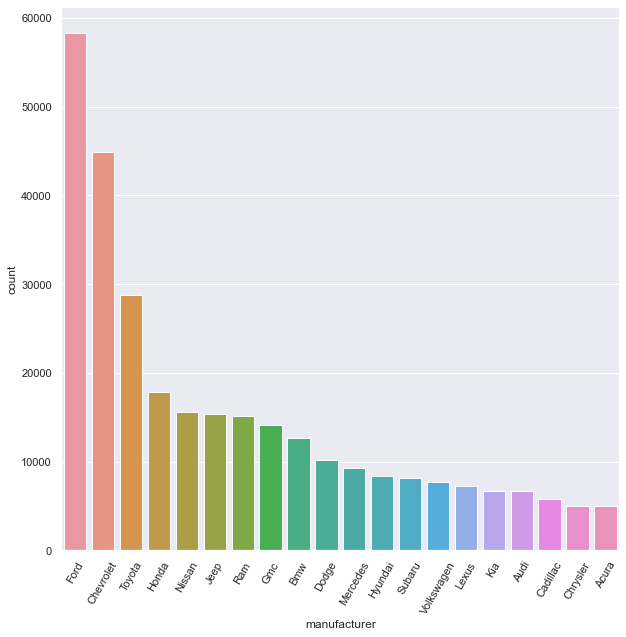

In [139]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'manufacturer',data = df1,order= df1['manufacturer'].value_counts().head(20).index)
plt.xticks(rotation=60)
plt.show()

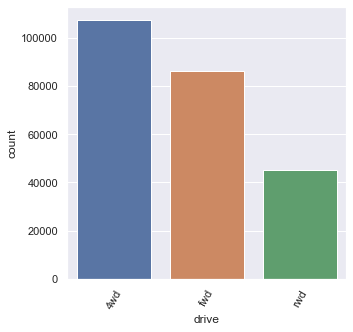

In [137]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'drive',data = df1,order= df1['drive'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

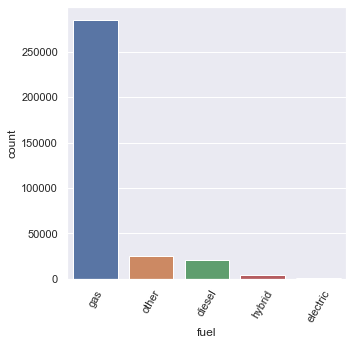

In [140]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'fuel',data = df1,order= df1['fuel'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

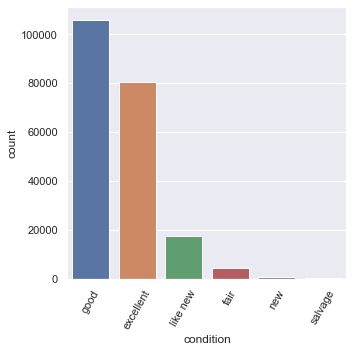

In [141]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'condition',data = df1,order= df1['condition'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

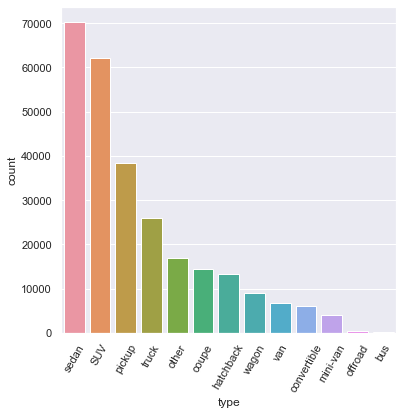

In [148]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'type',data = df1,order= df1['type'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

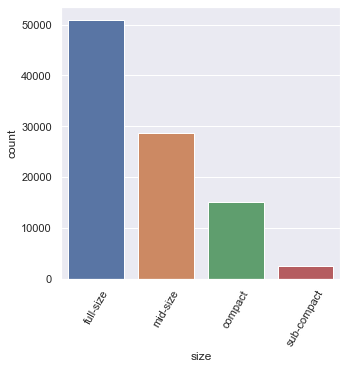

In [149]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'size',data = df1,order= df1['size'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

In [46]:
df['make_model'].count()

409234

### Age vs. Listing Price

In [76]:

df2 = df1.copy()
#df2['age'] = (2022 - df2['year'])

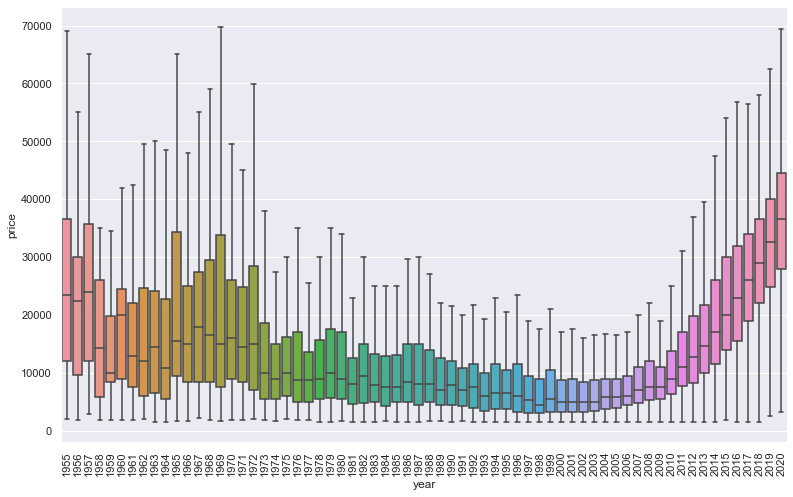

In [78]:
plt.figure(figsize=(13,8))
sns.boxplot(y="price", x="year",data=df2,showfliers = False)
plt.xticks(rotation=90)
plt.show()

### View Correlations Between Numerical Data

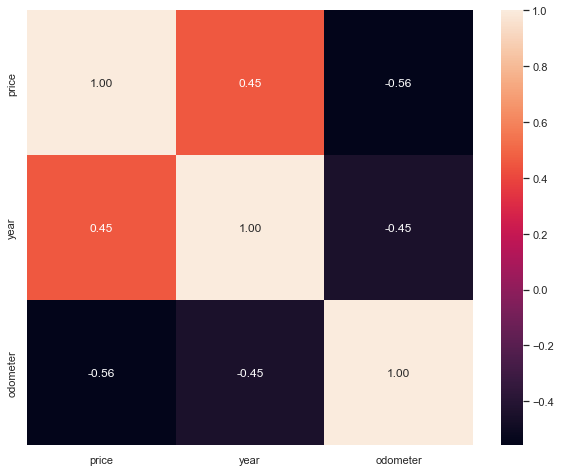

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(method='pearson'),annot=True,fmt='.2f')
plt.show()

### Create New Dataframe Using Features Relevant for Our Analysis

In [161]:
df2['age'] = (2022 - df2['year'])

In [162]:
df3 = df2[['price','manufacturer','condition','cylinders','fuel','odometer','year',
          'title_status','transmission','drive','size','type','paint_color','make_model']]

In [164]:
df3.describe()

,price,odometer,year,age
count,337976.000000,337976.000000,337976.000000,337976.000000
mean,19154.227756,95807.168358,2011.556324,10.443676
std,13766.681912,61533.396244,7.680045,7.680045
min,1508.000000,5003.000000,1955.000000,2.000000
25%,7995.000000,42703.750000,2008.000000,5.000000
50%,15990.000000,90646.500000,2013.000000,9.000000
75%,27590.000000,137000.000000,2017.000000,14.000000
max,99995.000000,499232.000000,2020.000000,67.000000


In [83]:
df3.shape


(337976, 15)

## Impute Missing Values for Categorical Variables

In [90]:
fill_mode = lambda col: col.fillna(col.mode()[0], inplace=True)
try:
    df3.apply(fill_mode, axis=0)
except:
    print('error')


### Filter Make / Manufacturer Data With Less than 20 Entries

In [165]:
df3 = df3.groupby('manufacturer').filter(lambda x : len(x)>20)
df3 = df3.groupby('make_model').filter(lambda x : len(x)>20)

### Group by Fuel Type and Manufacturer

In [166]:
fuel_group = df3.groupby(['fuel'])

In [167]:
manu_group = df3.groupby(['manufacturer'])

## View Price/Age and Price/Mileage correlations by group

In [168]:
age_corr_manu = manu_group[['year','price']].corr(method='pearson')
age_corr_fuel = fuel_group[['year','price']].corr(method='pearson')

In [169]:
age_plt = age_corr_manu.reset_index()
age_plt.set_index('manufacturer',inplace=True)

In [170]:
#age_plt

In [171]:
fuel_plt = age_corr_fuel.reset_index()
fuel_plt = fuel_plt[fuel_plt['fuel'] != 'other']
fuel_plt.set_index('fuel',inplace=True)

In [172]:
age_plt = age_plt[age_plt['level_1'] =='year']
fuel_plt = fuel_plt[fuel_plt['level_1'] == 'year']

age_plt_max = age_plt.sort_values(by='price',ascending=False).nlargest(10,columns='price')
age_plt_min = age_plt.sort_values(by='price',ascending=False).nsmallest(10,columns='price')
fuel_age = fuel_plt.sort_values(by='price',ascending=False).nlargest(10,columns='price')


In [173]:
#age_plt_max

<AxesSubplot:ylabel='manufacturer'>

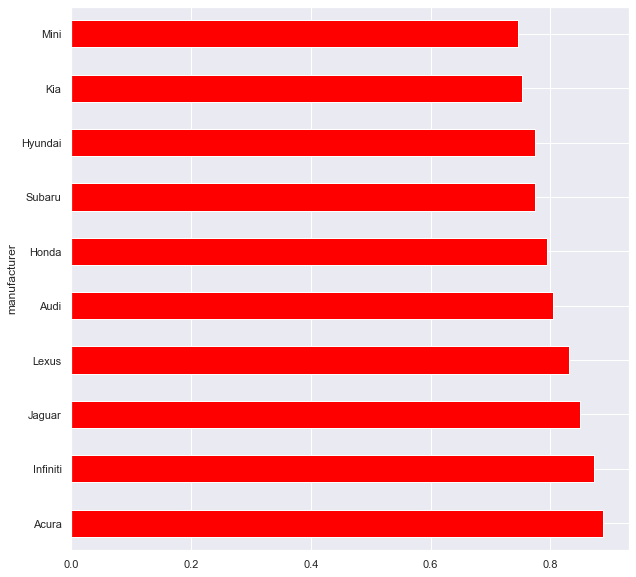

In [174]:
age_plt_max['price'].plot(kind='barh',color='red',figsize=(10,10))


<AxesSubplot:ylabel='manufacturer'>

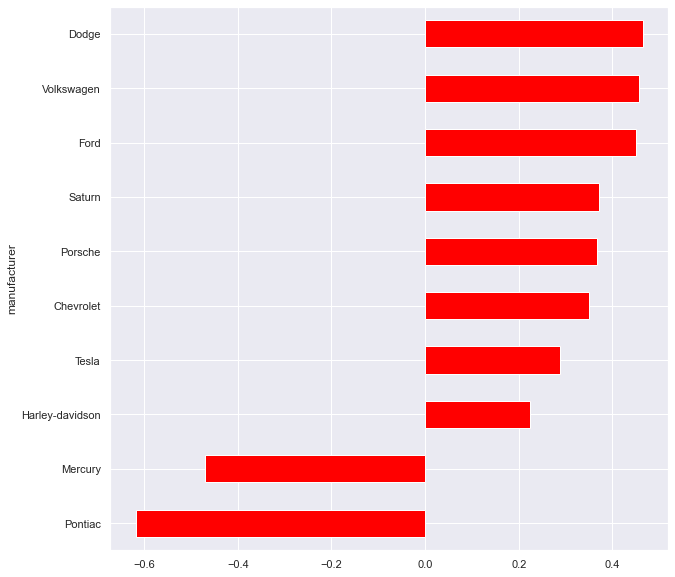

In [175]:
age_plt_min['price'].plot(kind='barh',color='red',figsize=(10,10))

<AxesSubplot:ylabel='fuel'>

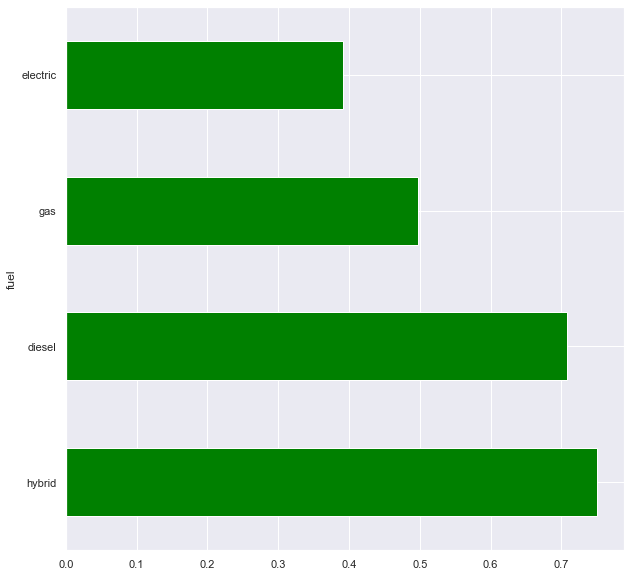

In [176]:
fuel_age['price'].plot(kind='barh',color='green',figsize=(10,10))